In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False


# from matplotlib import rc
# rc('font', family='AppleGothic')
# plt.rcParams['axes.unicode_minus'] = False

# 당별로 부정/긍정 빈도수 확인

In [2]:
df = pd.read_csv('./data/2024결과.csv')
# df = df[df['party_name'] != '코리아']

df

,party_content,party_name,label
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당,0
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘,0
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래,0
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당,0
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘,0
...,...,...,...
185259,"이 의원은 이날 뉴스1 통화에서 ""(무소속 출마도) 충분히 자신 있다""며 ""당선 후...",무소속,1
185260,앞서 국민의힘 공천관리위원회는 이날 이 의원 지역구인 울산 남갑을 비롯해 강남갑·을...,국민의힘,1
185261,"대구 동갑은 류성걸 의원, 대구 북갑은 국민의힘 의원 지역구다",국민의힘,0
185262,"이 의원은 이날 페이스북에도 ""오늘 국민의힘이 저를 버렸다""며 ""잠시 떠나더라도 승...",국민의힘,1


In [3]:
df['label'].unique()

array([0, 1], dtype=int64)

In [4]:
df['label'] = df['label'].apply(lambda x: '긍정' if x == 1 else '부정')

In [5]:
df.head()

,party_content,party_name,label
0,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,더불어민주당,부정
1,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,국민의힘,부정
2,지상파·종편 여론조사서 접전 양상…오차 범위 내 동률도신당 포함시 민주 33% 국힘...,새로운미래,부정
3,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,더불어민주당,부정
4,1 뉴스1 ⓒ News1 민경석 기자(서울=뉴스1) 노선웅 기자 = 올해 4월10일...,국민의힘,부정


In [6]:
res_dic = {}


for party, label in zip(df['party_name'], df['label']):
    if party not in res_dic:
        res_dic[party] = {'긍정' : 0, '부정' : 0}
    else:
        res_dic[party][label] += 1

for party, counts in res_dic.items():
    print('당 : {}'.format(party))
    print('긍정 : {}'.format(counts['긍정']))
    print('부정 : {}'.format(counts['부정']))   

당 : 더불어민주당
긍정 : 8788
부정 : 49118
당 : 국민의힘
긍정 : 15413
부정 : 69761
당 : 새로운미래
긍정 : 3433
부정 : 7515
당 : 개혁신당
긍정 : 5363
부정 : 12895
당 : 진보당
긍정 : 909
부정 : 2950
당 : 자유통일당
긍정 : 80
부정 : 496
당 : 신한반도당
긍정 : 0
부정 : 1
당 : 무소속
긍정 : 850
부정 : 1979
당 : 노동당
긍정 : 59
부정 : 147
당 : 소나무당
긍정 : 37
부정 : 167
당 : 녹색정의당
긍정 : 711
부정 : 1839
당 : 자유민주당
긍정 : 4
부정 : 3
당 : 한국국민당
긍정 : 2
부정 : 0
당 : 우리공화당
긍정 : 6
부정 : 34
당 : 한국농어민당
긍정 : 1
부정 : 3
당 : 국민의미래
긍정 : 550
부정 : 849
당 : 새진보연합
긍정 : 519
부정 : 765


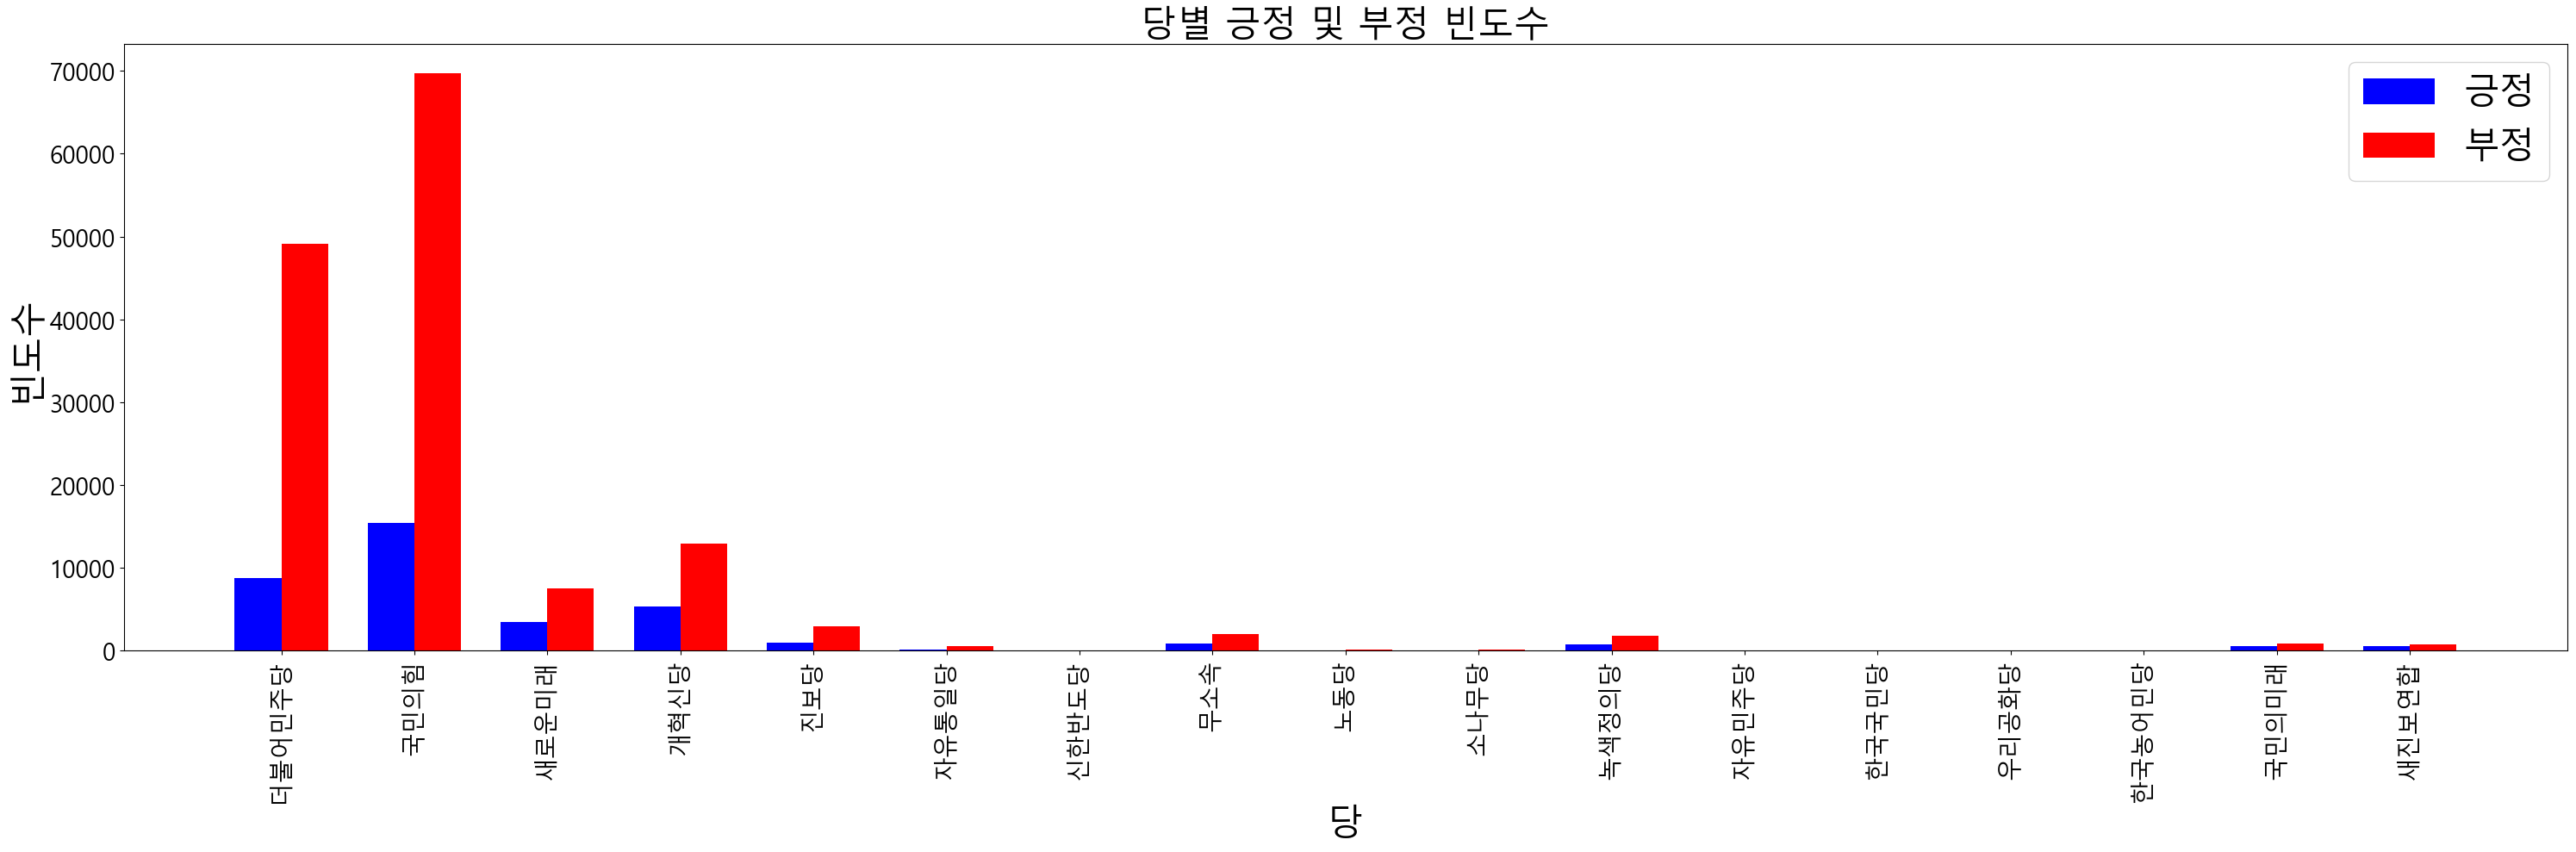

In [7]:
# 그래프를 그리기 위한 데이터 준비
parties = list(res_dic.keys())
positive_counts = [value['긍정'] for value in res_dic.values()]
negative_counts = [value['부정'] for value in res_dic.values()]

# 그래프 설정
bar_width = 0.35
index = np.arange(len(parties))  # 막대 그래프의 위치 설정

# 긍정과 부정을 나타내는 막대 그래프 그리기
plt.figure(figsize = (30, 10))
plt.bar(index, positive_counts, bar_width, label='긍정', color='blue', align='center')
plt.bar(index + bar_width, negative_counts, bar_width, label='부정', color='red', align='center')
plt.yticks(fontsize=20)

# 당 이름을 x축에 표시
plt.xlabel('당', fontsize = 30)
plt.ylabel('빈도수', fontsize = 30)
plt.title('당별 긍정 및 부정 빈도수', fontsize = 30)
plt.xticks(index + bar_width / 2, parties, rotation = 90, fontsize = 20)

# 범례 표시
plt.legend(fontsize = 30)

# 그래프 출력
plt.tight_layout()

In [8]:
num_df = pd.DataFrame(res_dic).T

print(num_df.shape)
num_df

(17, 2)


,긍정,부정
더불어민주당,8788,49118
국민의힘,15413,69761
새로운미래,3433,7515
개혁신당,5363,12895
진보당,909,2950
자유통일당,80,496
신한반도당,0,1
무소속,850,1979
노동당,59,147
소나무당,37,167


In [9]:
num_df = num_df.reset_index()
num_df.columns = [['party', 'pos', 'neg']]
num_df.columns = num_df.columns.get_level_values(0)
num_df.columns

Index(['party', 'pos', 'neg'], dtype='object')

In [10]:
num_df['pos'] = num_df['pos'] / num_df['pos'].sum()
num_df['neg'] = num_df['neg'] / num_df['neg'].sum()
num_df

,party,pos,neg
0,더불어민주당,0.239292,0.330712
1,국민의힘,0.419687,0.469701
2,새로운미래,0.093479,0.050599
3,개혁신당,0.146031,0.086822
4,진보당,0.024752,0.019862
5,자유통일당,0.002178,0.003340
6,신한반도당,0.000000,0.000007
7,무소속,0.023145,0.013325
8,노동당,0.001607,0.000990
9,소나무당,0.001007,0.001124


In [11]:
df_2024 = num_df

In [12]:
df_2020 = pd.read_csv('./data/2020_결과.csv')

df_2016 = pd.read_csv('./data/2016_결과.csv')

In [13]:
df_2020['res'] = df_2020['res'] / df_2020['res'].sum()
df_2016['res'] = df_2016['res'] / df_2016['res'].sum()

In [14]:
df_2016.columns = [['party', '2016_res', '2016_pos', '2016_neg']]
df_2020.columns = [['party', '2020_res', '2020_pos', '2020_neg']]

In [15]:
df_2016.columns = df_2016.columns.get_level_values(0)
df_2020.columns = df_2020.columns.get_level_values(0)

In [16]:
df = pd.merge(df_2016, df_2020, on='party', how='outer')
df = df.fillna(0)
df

,party,2016_res,2016_pos,2016_neg,2020_res,2020_pos,2020_neg
0,더불어민주당,0.487952,9968.0,50432.0,0.543333,9077.0,48390.0
1,새누리당,0.403614,24055.0,65768.0,0.000000,536.0,1996.0
2,국민의당,0.072289,11765.0,46734.0,0.010000,2365.0,9352.0
3,무소속,0.024096,4306.0,16682.0,0.016667,1503.0,10846.0
4,정의당,0.012048,2798.0,7760.0,0.020000,4257.0,13975.0
5,한국국민당,0.000000,47.0,62.0,0.000000,0.0,0.0
6,통일한국당,0.000000,40.0,16.0,0.000000,0.0,0.0
7,진리대한당,0.000000,40.0,27.0,0.000000,0.0,0.0
8,친반통합,0.000000,35.0,23.0,0.000000,0.0,0.0
9,일제·위안부·인권정당,0.000000,1.0,6.0,0.000000,0.0,0.0


In [17]:
df['tot_pos'] = df['2016_pos'] + df['2020_pos']
df['tot_neg'] = df['2016_neg'] + df['2020_neg']
df['tot_res'] = df['2016_res'] + df['2020_res']
df['pos'] = df['tot_pos'] / df['tot_pos'].sum()
df['neg'] = df['tot_neg'] / df['tot_neg'].sum()
df['res'] = df['tot_res'] / df['tot_res'].sum()

df = df[['party', 'pos', 'neg', 'res']]
df

,party,pos,neg,res
0,더불어민주당,0.178561,0.210773,0.515643
1,새누리당,0.230559,0.144531,0.201807
2,국민의당,0.132480,0.119623,0.041145
3,무소속,0.054464,0.058713,0.020382
4,정의당,0.066146,0.046358,0.016024
5,한국국민당,0.000441,0.000132,0.000000
6,통일한국당,0.000375,0.000034,0.000000
7,진리대한당,0.000375,0.000058,0.000000
8,친반통합,0.000328,0.000049,0.000000
9,일제·위안부·인권정당,0.000009,0.000013,0.000000


# 의자 예측

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

In [19]:
X = df[['party', 'pos', 'neg']]
y = df['res']

In [20]:
enc = OneHotEncoder(handle_unknown='ignore')
party_encoded = enc.fit_transform(X[['party']])
party_df = pd.DataFrame(party_encoded.toarray(), columns=enc.get_feature_names_out(['party']))
X = pd.concat([X.drop('party', axis=1), party_df], axis=1)

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

# 검증 세트를 사용하여 예측 수행
y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.020167086501704824


In [23]:
X_2024 = df_2024[['party', 'pos', 'neg']]
party_encoded_2024 = enc.transform(X_2024[['party']])
party_df_2024 = pd.DataFrame(party_encoded_2024.toarray(), columns=enc.get_feature_names_out(['party']))
X_2024 = pd.concat([X_2024.drop('party', axis=1), party_df_2024], axis=1)
predictions_2024 = model.predict(X_2024)
df_2024['res'] = predictions_2024
print(df_2024)

     party       pos       neg       res
0   더불어민주당  0.239292  0.330712  0.032304
1     국민의힘  0.419687  0.469701  0.046340
2    새로운미래  0.093479  0.050599  0.014755
3     개혁신당  0.146031  0.086822  0.018687
4      진보당  0.024752  0.019862  0.010229
5    자유통일당  0.002178  0.003340  0.008505
6    신한반도당  0.000000  0.000007  0.008274
7      무소속  0.023145  0.013325  0.009908
8      노동당  0.001607  0.000990 -0.000169
9     소나무당  0.001007  0.001124  0.008365
10   녹색정의당  0.019360  0.012382  0.009687
11   자유민주당  0.000109  0.000020  0.008280
12   한국국민당  0.000054  0.000000  0.008277
13   우리공화당  0.000163  0.000229 -0.000400
14  한국농어민당  0.000027  0.000020  0.008276
15   국민의미래  0.014976  0.005716  0.009224
16   새진보연합  0.014132  0.005151  0.009161


In [24]:
df_2024['res'] = df_2024['res'] * 100
df_2024

,party,pos,neg,res
0,더불어민주당,0.239292,0.330712,3.230360
1,국민의힘,0.419687,0.469701,4.634010
2,새로운미래,0.093479,0.050599,1.475541
3,개혁신당,0.146031,0.086822,1.868678
4,진보당,0.024752,0.019862,1.022912
5,자유통일당,0.002178,0.003340,0.850484
6,신한반도당,0.000000,0.000007,0.827417
7,무소속,0.023145,0.013325,0.990817
8,노동당,0.001607,0.000990,-0.016886
9,소나무당,0.001007,0.001124,0.836519


In [25]:
a = df_2024[df_2024['res'] > 0.5]
a['res'] = a['res'] * 10
a

C:\Users\mit005\AppData\Local\Temp\ipykernel_13640\2981315447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['res'] = a['res'] * 10


,party,pos,neg,res
0,더불어민주당,0.239292,0.330712,32.303602
1,국민의힘,0.419687,0.469701,46.340099
2,새로운미래,0.093479,0.050599,14.755412
3,개혁신당,0.146031,0.086822,18.686785
4,진보당,0.024752,0.019862,10.229115
5,자유통일당,0.002178,0.003340,8.504836
6,신한반도당,0.000000,0.000007,8.274172
7,무소속,0.023145,0.013325,9.908169
9,소나무당,0.001007,0.001124,8.365187
10,녹색정의당,0.019360,0.012382,9.686630
